# Experimental reports

Experiments performed on 15 data sets:


* Yeast                    
* CAL500                   
* VirusGO                  
* Enron                    
* Emotions                 
* Genbase                  
* Image                    
* 3sources_bbc1000         
* 3sources_guardian1000    
* 3sources_inter3000       
* Water-quality            
* Medical                  
* GnegativeGO              
* GpositiveGO              
* Scene                    

Methodology 

The dataset is divided into 10 folds, in each iteration of cross-validation one of these folds is selected as the test set and the remaining folds are divided into validation and training sets in the ratio of 30% and 70%, respectively. Each DTECCd model with Phic in [0.0, 0.25, 0.5, 0.75, 1] is then trained on the training set and validated on the validation set. The results for each model are then compared according to a pre-selected metric [accuracy, fmeasure, subset accuracy, hamming loss] and the best model is selected and applied to the test set. After 10 rounds we will have the results for all folds in the original data set for the selected metric.

## Importing data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

datasets = ["Genbase", "GnegativeGO","Yeast","Medical","3sources_inter3000","3sources_guardian1000","Scene","3sources_bbc1000","VirusGO","Emotions","GpositiveGO","Enron","Image", "Water-quality","CAL500"]

def pretty_arffname(arfffilename):
  size = len(arfffilename)
  slash_position = arfffilename.find('/', int(size/2))
  return arfffilename[slash_position+1:size-5]

## F-Measure

### Preparation

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Mestrado/DTECCMASK/phi search/FME/resultsFMEE.csv').fillna(0)

df.arffFilename = df.arffFilename.apply(pretty_arffname)
df = df[ df.arffFilename.isin(datasets) ]

df.Learner = df.Learner.map({'EnsembleOfClassifierChainsStackSTACK': 'STACKECC', 'EnsembleOfClassifierChainsStack': 'STACKECC', 'EnsembleOfClassifierChainsDT': 'DTECC','EnsembleOfClassifierChainsMV': 'MVECC', 'EnsembleOfClassifierChainsME': 'MEECC'})
df.drop(columns=['AverageMAE', 'AveragePrecision', 'AverageRMSE', 'Coverage', 'ErrorSetSize', 'LogLoss', 'MeanAveragePrecision', 'MeanSquaredError', 'MicroAUC', 'OneError', 'RankingLoss', 'RootMeanSquaredError'], inplace=True)

In [ ]:
df['ACC_Rank'] = df.groupby(['arffFilename'])['ExampleBasedAccuracy'].rank(ascending=False)
df['PRE_Rank'] = df.groupby(['arffFilename'])['ExampleBasedPrecision'].rank(ascending=False)
df['REC_Rank'] = df.groupby(['arffFilename'])['ExampleBasedRecall'].rank(ascending=False)
df['SAC_Rank'] = df.groupby(['arffFilename'])['SubsetAccuracy'].rank(ascending=False)
df['FME_Rank'] = df.groupby(['arffFilename'])['ExampleBasedFMeasure'].rank(ascending=False)
df['HML_Rank'] = df.groupby(['arffFilename'])['HammingLoss'].rank(ascending=True)

df_fme = df

In [ ]:
def create_metric_table(metric = 'ExampleBasedAccuracy', rank = 'ACC_Rank'):
  df_mv = df[df.Learner == 'MVECC'][['arffFilename',	metric, rank]].set_index('arffFilename')
  df_mv.columns = ['MV', 'RankMV']
  df_mv["MVECC"] = df_mv["MV"].apply("{:.4f}".format) + '(' + df_mv["RankMV"].astype(str) + ')'

  df_me = df[df.Learner == 'MEECC'][['arffFilename',	metric, rank]].set_index('arffFilename')
  df_me.columns = ['ME', 'RankME']
  df_me["MEECC"] = df_me["ME"].apply("{:.4f}".format) + '(' + df_me["RankME"].astype(str) + ')'
  
  df_st = df[df.Learner == 'STACKECC'][['arffFilename',	metric, rank]].set_index('arffFilename')
  df_st.columns = ['ST', 'RankSTACK']
  df_st["STACKECC"] = df_st["ST"].apply("{:.4f}".format) + '(' + df_st["RankSTACK"].astype(str) + ')'
  
  df_mk = df[df.Learner == 'DTECC'][['arffFilename',	metric, rank]].set_index('arffFilename')
  df_mk.columns = ['MK', 'RankMASK']
  df_mk["DTECCd"] = df_mk["MK"].apply("{:.4f}".format) + '(' + df_mk["RankMASK"].astype(str) + ')'

  return df_mv.join(df_me).join(df_st).join(df_mk)[['DTECCd', 'MEECC', 'MVECC', 'STACKECC']].sort_values(by=['arffFilename'])

### Results

Average ranking for F-Measure

In [ ]:
df_mean_rank = df.groupby(['Learner'])[['FME_Rank']].mean()
df_mean_rank.style.highlight_min(color='yellow')

,FME_Rank
Learner,
DTECC,1.933333
MEECC,2.600000
MVECC,2.266667
STACKECC,3.200000


## Subset-accuracy

### Preparation

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Mestrado/DTECCMASK/phi search/SAC/resultsSACE.csv').fillna(0)

df.arffFilename = df.arffFilename.apply(pretty_arffname)
df = df[ df.arffFilename.isin(datasets) ]

df.Learner = df.Learner.map({'EnsembleOfClassifierChainsStackSTACK': 'STACKECC', 'EnsembleOfClassifierChainsStack': 'STACKECC', 'EnsembleOfClassifierChainsDT': 'DTECC','EnsembleOfClassifierChainsMV': 'MVECC', 'EnsembleOfClassifierChainsME': 'MEECC'})
df.drop(columns=['AverageMAE', 'AveragePrecision', 'AverageRMSE', 'Coverage', 'ErrorSetSize', 'LogLoss', 'MeanAveragePrecision', 'MeanSquaredError', 'MicroAUC', 'OneError', 'RankingLoss', 'RootMeanSquaredError'], inplace=True)

In [ ]:
df['ACC_Rank'] = df.groupby(['arffFilename'])['ExampleBasedAccuracy'].rank(ascending=False)
df['PRE_Rank'] = df.groupby(['arffFilename'])['ExampleBasedPrecision'].rank(ascending=False)
df['REC_Rank'] = df.groupby(['arffFilename'])['ExampleBasedRecall'].rank(ascending=False)
df['SAC_Rank'] = df.groupby(['arffFilename'])['SubsetAccuracy'].rank(ascending=False)
df['FME_Rank'] = df.groupby(['arffFilename'])['ExampleBasedFMeasure'].rank(ascending=False)
df['HML_Rank'] = df.groupby(['arffFilename'])['HammingLoss'].rank(ascending=True)

df_sac = df

### Results

Average ranking for Subset Accuracy

In [ ]:
df_mean_rank = df.groupby(['Learner'])[['SAC_Rank']].mean()
df_mean_rank.style.highlight_min(color='yellow')

,SAC_Rank
Learner,
DTECC,2.033333
MEECC,2.200000
MVECC,2.500000
STACKECC,3.266667


## Accuracy

### Preparation

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Mestrado/DTECCMASK/phi search/ACC/resultsACCE.csv').fillna(0)
df.arffFilename = df.arffFilename.apply(pretty_arffname)
df = df[ df.arffFilename.isin(datasets) ]
df.Learner = df.Learner.map({'EnsembleOfClassifierChainsStack': 'STACKECC', 'EnsembleOfClassifierChainsDT': 'DTECC','EnsembleOfClassifierChainsMV': 'MVECC', 'EnsembleOfClassifierChainsME': 'MEECC'})
df.drop(columns=['AverageMAE', 'AveragePrecision', 'AverageRMSE', 'Coverage', 'ErrorSetSize', 'LogLoss', 'MeanAveragePrecision', 'MeanSquaredError', 'MicroAUC', 'OneError', 'RankingLoss', 'RootMeanSquaredError'], inplace=True)

In [ ]:
df['ACC_Rank'] = df.groupby(['arffFilename'])['ExampleBasedAccuracy'].rank(ascending=False)
df['PRE_Rank'] = df.groupby(['arffFilename'])['ExampleBasedPrecision'].rank(ascending=False)
df['REC_Rank'] = df.groupby(['arffFilename'])['ExampleBasedRecall'].rank(ascending=False)
df['SAC_Rank'] = df.groupby(['arffFilename'])['SubsetAccuracy'].rank(ascending=False)
df['FME_Rank'] = df.groupby(['arffFilename'])['ExampleBasedFMeasure'].rank(ascending=False)
df['HML_Rank'] = df.groupby(['arffFilename'])['HammingLoss'].rank(ascending=True)

df_acc = df

### Results

Average ranking for Accuracy

In [ ]:
df_mean_rank = df.groupby(['Learner'])[['ACC_Rank']].mean()
df_mean_rank.style.highlight_min(color='yellow')

,ACC_Rank
Learner,
DTECC,1.766667
MEECC,2.733333
MVECC,2.433333
STACKECC,3.066667


## Hamming Loss


### Preparation

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Mestrado/DTECCMASK/phi search/HML/resultsHMLE.csv').fillna(0)

def pretty_arffname(arfffilename):
  size = len(arfffilename)
  slash_position = arfffilename.find('/', int(size/2))
  return arfffilename[slash_position+1:size-5]


df.arffFilename = df.arffFilename.apply(pretty_arffname)

#df = df[ (df.arffFilename == "Water-quality") | (df.arffFilename == "Medical") | (df.arffFilename == "GnegativeGO") | (df.arffFilename == "Genbase") | (df.arffFilename == "Enron") | (df.arffFilename == "Emotions") | (df.arffFilename == "CAL500") | (df.arffFilename == "3sources_inter3000") | (df.arffFilename == "3sources_guardian1000") | (df.arffFilename == "VirusGO") | (df.arffFilename == "GpositiveGO") ]#| (df.arffFilename == "Yeast") | (df.arffFilename == "Image") | (df.arffFilename == "3sources_bbc1000") | (df.arffFilename == "Scene")
'''
Yeast                    3
Image                    3
3sources_bbc1000         3
Scene                    3
'''
df = df[ df.arffFilename.isin(datasets) ]


df.Learner = df.Learner.map({'EnsembleOfClassifierChainsStack': 'STACKECC', 'EnsembleOfClassifierChainsDT': 'DTECC','EnsembleOfClassifierChainsMV': 'MVECC', 'EnsembleOfClassifierChainsME': 'MEECC'})
df = df[ (df.Learner != "MLS") ]
df.drop(columns=['AverageMAE', 'AveragePrecision', 'AverageRMSE', 'Coverage', 'ErrorSetSize', 'LogLoss', 'MeanAveragePrecision', 'MeanSquaredError', 'MicroAUC', 'OneError', 'RankingLoss', 'RootMeanSquaredError'], inplace=True)

In [ ]:
df['ACC_Rank'] = df.groupby(['arffFilename'])['ExampleBasedAccuracy'].rank(ascending=False)
df['PRE_Rank'] = df.groupby(['arffFilename'])['ExampleBasedPrecision'].rank(ascending=False)
df['REC_Rank'] = df.groupby(['arffFilename'])['ExampleBasedRecall'].rank(ascending=False)
df['SAC_Rank'] = df.groupby(['arffFilename'])['SubsetAccuracy'].rank(ascending=False)
df['FME_Rank'] = df.groupby(['arffFilename'])['ExampleBasedFMeasure'].rank(ascending=False)
df['HML_Rank'] = df.groupby(['arffFilename'])['HammingLoss'].rank(ascending=True)

df_hml = df

### Results

Average ranking for Hamming Loss

In [ ]:
df_mean_rank = df.groupby(['Learner'])[['HML_Rank']].mean()
df_mean_rank.style.highlight_min(color='yellow')

,HML_Rank
Learner,
DTECC,2.166667
MEECC,1.933333
MVECC,2.533333
STACKECC,3.366667


# Friedman-Nemenyi

https://orange3.readthedocs.io/projects/orange-data-mining-library/en/latest/reference/evaluation.cd.html

In [ ]:
!pip install orange3

In [ ]:

def compare_table(df, metric):
  df_mv = df[df.Learner == 'MVECC'][['arffFilename',	metric]].set_index('arffFilename')
  df_mv.columns = ['MVECC']

  df_me = df[df.Learner == 'MEECC'][['arffFilename',	metric]].set_index('arffFilename')
  df_me.columns = ['MEECC']
  
  df_dtf = df[df.Learner == 'DTECC'][['arffFilename',	metric]].set_index('arffFilename')
  df_dtf.columns = ['DTECC']

  df_st = df[df.Learner == 'STACKECC'][['arffFilename',	metric]].set_index('arffFilename')
  df_st.columns = ['STACKECC']

  return df_mv.join(df_me).join(df_dtf).join(df_st)

In [ ]:
from Orange.evaluation import compute_CD, graph_ranks
from scipy.stats import wilcoxon, friedmanchisquare, rankdata
import matplotlib.pyplot as plt

def friedman_nemeyi_test(df, metric, ascending=False):
  df_metric = compare_table(df, metric)
  # First, we extract the algorithms names.
  algorithms_names = df_metric.columns
  # Then, we extract the performances as a numpy.ndarray.
  performances_array = df_metric[algorithms_names].values
  # Finally, we apply the Friedman test.
  print(friedmanchisquare(*performances_array))

  # Calculating the ranks of the algorithms for each dataset. The value of p is multipled by -1
  # because the rankdata method ranks from the smallest to the greatest performance values.
  # Since we are considering AUC as our performance measure, we want larger values to be best ranked.
  multiplier = 1 if ascending else -1
  ranks = np.array([rankdata(multiplier*p) for p in performances_array])
  # Calculating the average ranks.
  average_ranks = np.mean(ranks, axis=0)
  print('\n'.join('{} average rank: {}'.format(a, r) for a, r in zip(algorithms_names, average_ranks)))

  # This method computes the critical difference for Nemenyi test with alpha=0.1.
  # For some reason, this method only accepts alpha='0.05' or alpha='0.1'.
  cd = compute_CD(average_ranks,
    n=len(df_metric),
    alpha='0.1',
    test='nemenyi')
  # This method generates the plot.
  graph_ranks(average_ranks,
    names=algorithms_names,
    cd=cd,
    width=4,
    textspace=1.5,
    reverse=True)
  plt.show()

FriedmanchisquareResult(statistic=51.875, pvalue=2.9523722212766094e-06)
MVECC average rank: 2.2666666666666666
MEECC average rank: 2.6
DTECC average rank: 1.9333333333333333
STACKECC average rank: 3.2


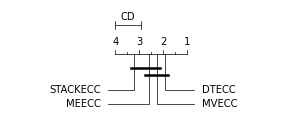

In [ ]:
friedman_nemeyi_test(df_fme, 'ExampleBasedFMeasure')

FriedmanchisquareResult(statistic=50.60000000000002, pvalue=4.843191325641056e-06)
MVECC average rank: 2.433333333333333
MEECC average rank: 2.7333333333333334
DTECC average rank: 1.7666666666666666
STACKECC average rank: 3.066666666666667


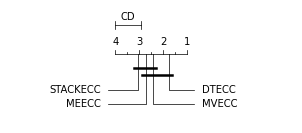

In [ ]:
friedman_nemeyi_test(df_acc, 'ExampleBasedAccuracy')

FriedmanchisquareResult(statistic=47.688869021010284, pvalue=1.4798929449216794e-05)
MVECC average rank: 2.5
MEECC average rank: 2.2
DTECC average rank: 2.033333333333333
STACKECC average rank: 3.2666666666666666


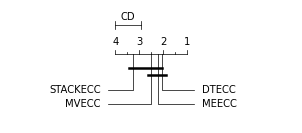

In [ ]:
friedman_nemeyi_test(df_sac, 'SubsetAccuracy')

FriedmanchisquareResult(statistic=37.400000000000006, pvalue=0.0006415365238120967)
MVECC average rank: 2.533333333333333
MEECC average rank: 1.9333333333333333
DTECC average rank: 2.1666666666666665
STACKECC average rank: 3.3666666666666667


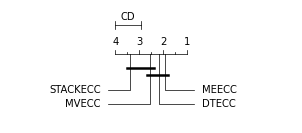

In [ ]:
friedman_nemeyi_test(df_hml, 'HammingLoss', True)